## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('./insurance.csv')
df.head()

,sex,age,smoker,region,BMI,#children,amout
0,male,55,no,W,29.90,0,10214.64
1,female,35,no,S,35.86,2,5836.52
2,male,34,no,W,32.80,1,14358.36
3,female,19,no,W,18.60,0,1728.90
4,female,39,no,S,23.87,5,8582.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1338 non-null   object 
 1   age        1338 non-null   int64  
 2   smoker     1338 non-null   object 
 3   region     1338 non-null   object 
 4   BMI        1338 non-null   float64
 5   #children  1338 non-null   int64  
 6   amout      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


array([[<Axes: title={'center': 'amout'}>]], dtype=object)

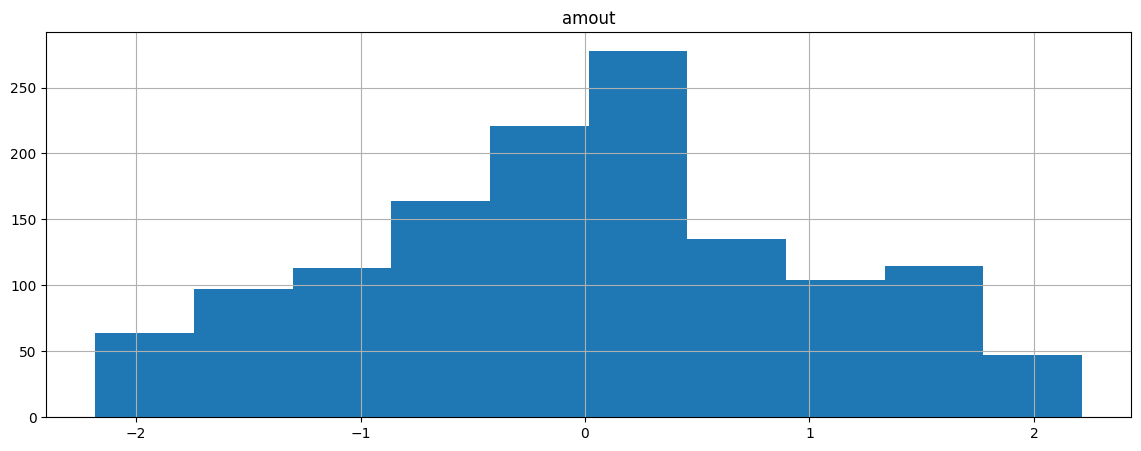

In [4]:
from sklearn.preprocessing import PowerTransformer

pow = PowerTransformer()
df[['amout']] = pd.DataFrame(pow.fit_transform(df[['amout']]), columns=['amout'])
df[['amout']].hist(figsize=(14, 5))

<Axes: >

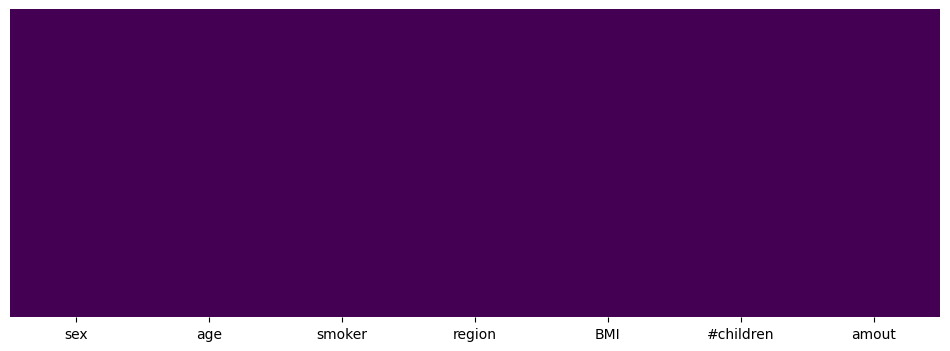

In [5]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [6]:
dum_sex = pd.get_dummies(df['sex'],prefix='OHE',drop_first=True ,dtype=float)
dum_smoker = pd.get_dummies(df['smoker'],prefix='OHE',drop_first=True ,dtype=float)
dum_region = pd.get_dummies(df['region'],prefix='OHE',drop_first=True ,dtype=float)

df = pd.concat([df, dum_sex, dum_smoker, dum_region], axis=1)

df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

df.head()

,age,BMI,#children,amout,OHE_male,OHE_yes,OHE_N,OHE_S,OHE_W
0,55,29.90,0,0.125099,1.0,0.0,0.0,0.0,1.0
1,35,35.86,2,-0.480490,0.0,0.0,0.0,1.0,0.0
2,34,32.80,1,0.500837,1.0,0.0,0.0,0.0,1.0
3,19,18.60,0,-1.746878,0.0,0.0,0.0,0.0,1.0
4,39,23.87,5,-0.064889,0.0,0.0,0.0,1.0,0.0


## Model Construction

In [7]:
from sklearn.model_selection import train_test_split

y = df['amout'].values.reshape(-1,1)
X = df.drop('amout', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [8]:
X_train.shape

(1070, 8)

In [9]:
y_train.shape

(1070, 1)

In [10]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
model = linReg.fit(X_train, y_train)

## Evaluation

In [11]:
from sklearn import metrics

y_pred = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = metrics.root_mean_squared_error(y_test, y_pred)

In [12]:
print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)

Mean Absolute Error: 0.3128289828199146
Mean Squared Error: 0.2411263826840254
Root Mean Squared Error: 0.49104621237112234
